In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.optimizers
import pickle
from Backtest import Backtest,Position,Bid
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("test_data.csv",index_col=[0])
data.index = pd.to_datetime(data.index)

In [3]:
def predict(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    my_array = X.reshape(-1, 1)
    scaled_Close = scaler.fit_transform(my_array)
    scaled_X = scaled_Close.reshape((1, 1, 10))

    y = model.predict(scaled_X)
    b = scaler.inverse_transform(y)
    r = (b[0] - X[-1]) / X[-1]
    return r[0]

In [29]:
model =  keras.models.load_model("stockprediction.h5")
def get_target_stocks(df):
    df = df.iloc[-10:,]
    res_dict = {}
    for ticker in df.columns:
        df[ticker+"_X"] = list(df[ticker].rolling(window=10))
        df[ticker+"_X"] = df[ticker+"_X"].apply(lambda x:x.values)
        ret = predict(df[ticker+"_X"].iloc[-1])
        if ret > 0.002:
            res_dict[ticker] = predict(df[ticker+"_X"].iloc[-1])
    
    return list(res_dict.keys())

In [30]:
def lstm(ti,df,positions,cash):
    bid_list = []
    
    if ti.hour == 9 and ti.minute == 30:
        print("====================={}=====================".format(ti))
    prices = df.iloc[-1]
    #selling if winning
    for pos in positions.values():
        ret = (pos.price - pos.wa_cost_price)/pos.wa_cost_price
        
        if ret > 0.002 or ret < -0.001:
            bid = Bid(ticker = pos.ticker, price = pos.price, shares = pos.shares, bid_type = 0)
            bid_list.append(bid)
    

    #buy
    if ti.minute == 0:
        target_stocks = get_target_stocks(df)
        if len(target_stocks) != 0:
            weight = cash//len(target_stocks)

            for ticker in target_stocks:
                bid = Bid(ticker = ticker, price = prices[ticker], shares = 100, bid_type = 1)
                bid_list.append(bid)

    #empty positions
    if ti.minute == 59:
        for pos in positions.values():
            bid = Bid(ticker = pos.ticker, price = pos.price, shares = pos.shares, bid_type = 0)
            bid_list.append(bid)
        
        
        
        
        
    return bid_list

In [31]:
model_bt = Backtest(data,lstm,has_tc = True)

In [32]:
model_bt.backtest_full()

=====================2019-04-05 09:30:00=====================
1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 70ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 32ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 40ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 184ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 38ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 52ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 32ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 92ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 34ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 33ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 36ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 38ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 47ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 63ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 71ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 33ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 49ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 35ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 44ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

=====================2019-04-02 09:30:00=====================
1/1 [==============================] - 0s 62ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 33ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

Not enough cash to build a position for isrg


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step
=====================2019-04-03 09:30:00=====================


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for chk
Not enough cash to build a position for intu
Not enough cash to build a position for ctl
Not enough cash to build a position for ms


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-04 09:30:00=====================
1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 44ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 98ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
Not enough cash to build a position for now
Not enough cash to build a position for crm
Not enough cash to build a position for intu
Not enough cash to build a position for pypl


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 42ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 26ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 32ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 31ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 47ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-26 09:30:00=====================
1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 41ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 40ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 44ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step
Not enough cash to build a position for nvda


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 18ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 55ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-17 09:30:00=====================
1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 128ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 42ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 231ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 111ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 90ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 32ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 48ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 47ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step
Not enough cash to build a position for anet
Not enough cash to build a position for ilmn
Not enough cash to build a position for amgn
Not enough cash to build a position for goog
Not enough cash to build a position for ea
Not enough cash to build a position for qcom
Not enough cash to build a position for aapl
Not enough cash to build a position for now
Not enough cash to build a position for ttwo
Not enough cash to build a position for lrcx
Not enough cash to build a position for cdns
Not enough cash to build a position for enph
Not enough cash to build a position for isrg
Not enough cash to build a position for gild
Not enough cash to build a position for adbe
Not enough cash to build a position for fb
Not enough cash to build a position for crm
Not enough cash to build a position for abbv
Not enough cash to build a position for uaa
Not enough cash to build a position for amzn
Not enough cash to build a position for intu
Not enough

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 39ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 34ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 57ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 39ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

=====================2019-04-10 09:30:00=====================
1/1 [==============================] - 0s 18ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 34ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-11 09:30:00=====================
1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 42ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 33ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-16 09:30:00=====================
1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

=====================2019-04-29 09:30:00=====================


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-18 09:30:00=====================
1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
Not enough cash to build a position for pcg
Not enough cash to build a position for anet
Not enough cash to build a position for amgn
Not enough cash to build a position for antm
Not enough cash to build a position for lly
Not enough cash to build a position for low
Not enough cash to build a position for chk
Not enough cash to build a position for m
Not enough cash to build a position for pfe
Not enough cash to build a position for gild
Not enough cash to build a position for unh
Not enough cash to build a position for x
Not enough cash to build a position for ge
Not enough cash to build a position for pm
Not enough cash to build a position for tgt
Not enough cash to build a position for abbv
Not enough cash to build a position for ebay
Not enough cash to build a position for ci
Not enough cash to build a position for cnc
Not enough cash to build a position for ctl
Not enough cash to build a position for abt
Not enough cash to build 

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
=====================2019-04-01 09:30:00=====================


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 52ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 97ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

=====================2019-04-30 09:30:00=====================
1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Not enough cash to build a position for stx
Not enough cash to build a position for aks
Not enough cash to build a position for lrcx
Not enough cash to build a position for wynn
Not enough cash to build a position for unh
Not enough cash to build a position for ci
Not enough cash to build a position for intu
Not enough cash to build a position for ma
Not enough cash to build a position for cnc


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
Not enough cash to build a position for adbe
Not enough cash to build a position for ci


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

=====================2019-04-08 09:30:00=====================
1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for wynn
Not enough cash to build a position for biib


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-09 09:30:00=====================
1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for chk


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
=====================2019-04-22 09:30:00=====================


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step
Not enough cash to build a position for isrg


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 43ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
=====================2019-04-25 09:30:00=====================


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for cmg
Not enough cash to build a position for fb


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 26ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 31ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 61ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 32ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 30ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 25ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-15 09:30:00=====================


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 41ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 34ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 38ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 39ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 28ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 36ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

=====================2019-04-12 09:30:00=====================
1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Not enough cash to build a position for chk


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 27ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 23ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

=====================2019-04-24 09:30:00=====================
1/1 [==============================] - 0s 15ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for chk


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step
=====================2019-04-23 09:30:00=====================


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 14ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 21ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 24ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 29ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 22ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 37ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 42ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 31ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - ETA: 0s

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 33ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 18ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares


1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 19ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 20ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))


1/1 [==============================] - 0s 16ms/step
Not enough cash to build a position for biib


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.purchase_history.keys(),self.purchase_history.values())])/self.shares
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_s

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 17ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 16ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

1/1 [==============================] - 0s 15ms/step


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_98580/3120185715.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ticker+"_X"] = list(df[ticker].rolling(window=10))
/Users/gideon/Desktop/General-Backtest/Backtest.py:287: RuntimeWarning: invalid value encountered in double_scalars
  self.wa_cost_price = sum([i*j for i,j in zip(self.pu

In [33]:
model_bt.transaction_history

dt ticker  type     price  shares    amount  \
0    2019-04-05 10:00:00   etsy     1   67.8650     100   6786.50   
1    2019-04-05 10:00:00    gme     1    9.8600     100    986.00   
2    2019-04-05 10:00:00    swn     1    4.6300     100    463.00   
3    2019-04-05 10:00:00     fb     1  175.7890     100  17578.90   
4    2019-04-05 10:01:00   etsy     0   68.0400     100   6804.00   
...                  ...    ...   ...       ...     ...       ...   
1027 2019-04-23 16:01:00    wft     0    0.6338     100     63.38   
1028 2019-04-23 16:01:00    ctl     0   10.4216     100   1042.16   
1029 2019-04-23 16:02:00    pcg     0   21.5300     100   2153.00   
1030 2019-04-23 16:02:00    dnr     0    2.6300     100    263.00   
1031 2019-04-23 16:02:00    nem     0   31.4471     100   3144.71   

        cash_left  transaction_cost    pnl  
0     93199.92700          13.57300   0.00  
1     92211.95500           1.97200   0.00  
2     91748.02900           0.92600   0.00  
3     74133.97120          35.15780   0.00  
4     80924.36320          13.60800  17.50  
...           ...               ...    ...  
1027  80607.38314           0.12676   0.38  
1028  81647.45882           2.08432   4.39  
1029  83796.15282           4.30600   7.00  
1030  84058.62682           0.52600   1.00  
1031  87197.04740           6.28942  32.06  

[1032 rows x 9 columns]

In [38]:
model_bt.transaction_history['pnl'].min()

-1070.0

In [40]:
model_bt.transaction_history.loc[model_bt.transaction_history['pnl'] < -1000]

dt ticker  type  price  shares   amount    cash_left  \
430 2019-04-16 16:01:00   nflx     0  344.4     100  34440.0  89032.29926   

     transaction_cost     pnl  
430             68.88 -1070.0

In [42]:
model_bt.transaction_history.loc[model_bt.transaction_history['ticker'] == 'nflx']

dt ticker  type    price  shares   amount    cash_left  \
168 2019-04-04 11:00:00   nflx     1  365.525     100  36552.5  51602.82936   
181 2019-04-04 11:08:00   nflx     0  366.310     100  36631.0  81204.31188   
283 2019-04-17 10:00:00   nflx     1  353.630     100  35363.0  46837.08068   
293 2019-04-17 10:04:00   nflx     0  355.364     100  35536.4  80677.43434   
425 2019-04-16 16:00:00   nflx     1  355.100     100  35510.0  55010.78572   
430 2019-04-16 16:01:00   nflx     0  344.400     100  34440.0  89032.29926   
626 2019-04-08 10:00:00   nflx     1  361.990     100  36199.0  56608.70590   
638 2019-04-08 10:04:00   nflx     0  362.837     100  36283.7  56920.34618   

     transaction_cost     pnl  
168           73.1050     0.0  
181           73.2620    78.5  
283           70.7260     0.0  
293           71.0728   173.4  
425           71.0200     0.0  
430           68.8800 -1070.0  
626           72.3980     0.0  
638           72.5674    84.7

<AxesSubplot:>

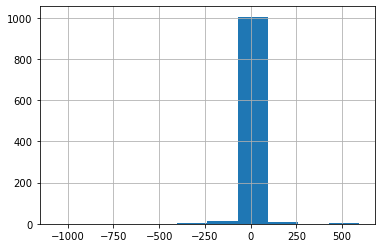

In [35]:
model_bt.transaction_history.pnl.hist()

In [36]:
model_bt.portfolio_tracker

dt  bid_count  position_count   cash_value  \
0    2019-04-05 09:30:00          0               0  100000.0000   
1    2019-04-05 09:30:00          0               0  100000.0000   
2    2019-04-05 09:31:00          0               0  100000.0000   
3    2019-04-05 09:32:00          0               0  100000.0000   
4    2019-04-05 09:33:00          0               0  100000.0000   
...                  ...        ...             ...          ...   
8837 2019-04-23 16:26:00          0               0   87197.0474   
8838 2019-04-23 16:27:00          0               0   87197.0474   
8839 2019-04-23 16:28:00          0               0   87197.0474   
8840 2019-04-23 16:29:00          0               0   87197.0474   
8841 2019-04-23 16:30:00          0               0   87197.0474   

      positions_value  total_value            bah  
0                 0.0  100000.0000  100000.000000  
1                 0.0  100000.0000   99856.000000  
2                 0.0  100000.0000   99866.790832  
3                 0.0  100000.0000   99926.823833  
4                 0.0  100000.0000   99827.385857  
...               ...          ...            ...  
8837              0.0   87197.0474  100606.956988  
8838              0.0   87197.0474  100578.631615  
8839              0.0   87197.0474  100571.295174  
8840              0.0   87197.0474  100562.975929  
8841              0.0   87197.0474  100575.231894  

[8842 rows x 7 columns]

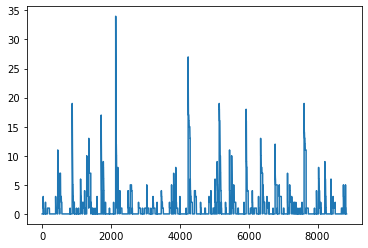

In [12]:
plt.plot(model_bt.portfolio_tracker['position_count'])

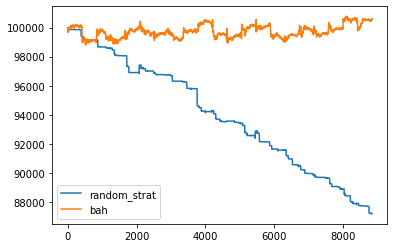

In [37]:
plt.plot(model_bt.portfolio_tracker['total_value'], label = 'random_strat')
plt.plot(model_bt.portfolio_tracker['bah'],label = 'bah')
plt.legend()